> # DEFAULT ON CREDIT CARD PAYMENT (RISK ANALYSIS)




# **Dataset Information**

The dataset used in this project was procurred from UCI machine learning repository. The dataset is a record of 30,000 customers and their credit card 
payment information over six months (April to September). The dataset contains 30,000 rows excluding the column headers and 24 columns. All currency is in $NT. The data contains no missing value.

# **Columns**
**LIMIT_BAL** - renamed CREDIT LIMIT(NT$) for the purpose of this analysis. It is the amount given as credit to the customer.it includes both the individual consumer credit and his/her family (supplementary) credit. 

**SEX** - renamed GENDER for the purpose of this analysis. It represents the gender of the credit card holder. The column contains numerical values (1 = male, 2 = female).

**EDUCATION** - The column represents the education level of the credit card holder. The column contains numerical values (1 = graduate school, 2 = university, 3 = high school, 4 = others). 

**MARITAL STATUS** - The column represents the marital status of the credit card holder. The column contains numerical values (1 = married, 2 = single, 3 = others).

**AGE** - The column represents the age of the credit card holder. The column contains numerical values

**REPAYMENT STATUS** - recorded over six columns, with each representing a month (from April to September 2005). it states the history of past payment. 

PAY_0 = the repayment status in September, 2005; PAY_2= the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. 

Measurement Scale


---


The measurement scale for the repayment status is: 
-2 = no consumption,
-1 = pay duly,
0  = Use of revolving credit,
 1 = payment delay for one month,
 2 = payment delay for two months; . . .; 
 8 = payment delay for eight months,
 9 = payment delay for nine months and above. 

**BILL STATEMENT** -  - recorded over six columns with each representing a month (from April to September 2005). it states the history of the monthly bill amount in NT($). 

BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 
                          
**AMOUNT OF PREVIOUS PAYMENT** - recorded over six columns with each representing a month (from April to September 2005). it states the history of the amount paid by each customer in NT($).  

PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.         

# **Introduction**

The Purpose of this analysis is to use machine learning and predictive algorithm to determine whether given certain characteristics a customer will be more likely to default on their credit card payment in the following month. Part 1 of the project will contain some descriptive analysis. This is done to provide in-depth understanding into the dataset and to see trends based on historical data.This section can be used as a foundation for Part 2 ( predictive analysis). In part 2, Decision tree method for machine learning will be used for our predictive model, in three steps.


*   Without any kind of feature selection

*   with selection of features using feature importance
*   with selection of features using three different test and taking the rankings of each feature.


 Then a confusion matrix will be created for all 3 decision tress to test the predictive accuracy. Finally, a ROC (receiver operating characteristic) curve will be created. 
 
 
 Part 3 will contain prescriptive analysis. all prescription would be suggested based on the results from part 1 and 2.

    Note: This dataset does not contain credit score of the customer. The credit score of the customer is a great indicator of their credit worthiness, therefore we will only rely on the information provided in the dataset.





Import the Libraries


In [0]:
## Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl

In [0]:
#df = pd.read_excel(r"C:\Users\Ramatu's PC\Desktop\430pm\Creditcard.xlsx", skiprows = 1)

# Cleaning and dataset Transformation



Import dataset from local drive

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Creditcard.xlsx to Creditcard (2).xlsx


In [0]:
# this cell imports my dataset 
import io
df = pd.read_excel(io.BytesIO(uploaded['Creditcard.xlsx']), skiprows=1)
#Dataset is now stored in a Pandas Dataframe
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [0]:
# This cell deletes the "ID" column. 
df.drop(['ID'], inplace = True, axis=1)

df 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [0]:
#shape attribute of dataset
df.shape

In [0]:
# Rename sex and limit_bal columns
df.rename(columns={"SEX":"GENDER", "LIMIT_BAL":"CREDIT LIMIT(NT$)", 'default payment next month': 'Default'}, inplace=True)

In [0]:
#this cell checks my dataset for any null values
df.isnull().sum() / df.shape[0]   

CREDIT LIMIT(NT$)    0.0
GENDER               0.0
EDUCATION            0.0
MARRIAGE             0.0
AGE                  0.0
PAY_0                0.0
PAY_2                0.0
PAY_3                0.0
PAY_4                0.0
PAY_5                0.0
PAY_6                0.0
BILL_AMT1            0.0
BILL_AMT2            0.0
BILL_AMT3            0.0
BILL_AMT4            0.0
BILL_AMT5            0.0
BILL_AMT6            0.0
PAY_AMT1             0.0
PAY_AMT2             0.0
PAY_AMT3             0.0
PAY_AMT4             0.0
PAY_AMT5             0.0
PAY_AMT6             0.0
Default              0.0
dtype: float64

In [0]:
#this cell double checks my dataset for any null values. Also gives general info about my df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
CREDIT LIMIT(NT$)    30000 non-null int64
GENDER               30000 non-null int64
EDUCATION            30000 non-null int64
MARRIAGE             30000 non-null int64
AGE                  30000 non-null int64
PAY_0                30000 non-null int64
PAY_2                30000 non-null int64
PAY_3                30000 non-null int64
PAY_4                30000 non-null int64
PAY_5                30000 non-null int64
PAY_6                30000 non-null int64
BILL_AMT1            30000 non-null int64
BILL_AMT2            30000 non-null int64
BILL_AMT3            30000 non-null int64
BILL_AMT4            30000 non-null int64
BILL_AMT5            30000 non-null int64
BILL_AMT6            30000 non-null int64
PAY_AMT1             30000 non-null int64
PAY_AMT2             30000 non-null int64
PAY_AMT3             30000 non-null int64
PAY_AMT4             30000 non-null int64
PAY_AMT5 

In [0]:
# Custom function to decode my daaset, specifically pay_0 to pay_6 ----- See markdown cell for column header meaning

def decoder(value):
    if value > 0 :
        return 1
    else :
        return 0

In [0]:
#this cell applies my custom function to my dataset (pay_0 to Pay_6)
# then it creates a transformed column that tells you how many late payments the customer has made
late_payments = df.loc[:,   'PAY_0':'PAY_6'].applymap(decoder).sum(axis=1)
df.insert(11,'Late Payments' ,late_payments )
df

,CREDIT LIMIT(NT$),GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Late Payments,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [0]:
df['GENDER'].unique() # Unique values in the sex column

array([2, 1])

In [0]:
df['EDUCATION'].unique() # Unique values in the sex column

array([2, 1, 3, 5, 4, 6, 0])

In [0]:
# 4,6, and 0 all represents other. 
# Hence, replace all three (5,6,0) with 4
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])


In [0]:
df['MARRIAGE'].unique() # Unique values in the marriage column

array([1, 2, 3, 0])

In [0]:
# 3 and 0 represent other. 
# Hence, replace 0 with 3 for other
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

In [0]:
df['Default'].unique()

array([1, 0])

# PART 1
DESCIPTIVE ANALYSIS

In [0]:
# Applying the describe method to a subset of our dataframe
# list of columns to include 
df[['CREDIT LIMIT(NT$)', 'AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()


,CREDIT LIMIT(NT$),AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


**Age**

The cell above tells us that:
*   The average age of the credit card holders is 35.5.

*   The youngest credit card holder is 21 years old and the oldest is 79 years old


*   25 percent of the customers are below 28 years old, and 25% are above 41 years old
*   half the customer are above 34 years old


**Credit Limit**
 



*   The mean Credit Limit is 167,484.32 NT$




*   The highest credit limit issued is 1,000,000 NT$

*   The Lowest credit limit issued is 10,000 NT$





In [0]:
# What is the relationship between gender and credit limit?
# which gender is more likely to have a higher limit on thier credit card?
Limit_by_gender = df.groupby('GENDER')['CREDIT LIMIT(NT$)'].mean()
Limit_by_gender

GENDER
1    163519.825034
2    170086.462014
Name: CREDIT LIMIT(NT$), dtype: float64

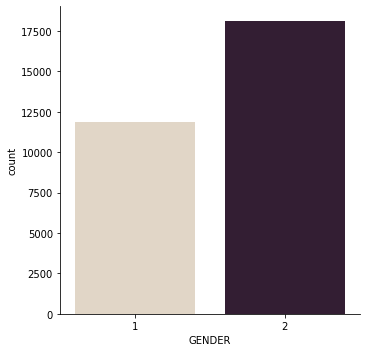

In [0]:
# barplot, count vs gender
sns.catplot(x="GENDER", kind="count", palette="ch:.25", data=df);

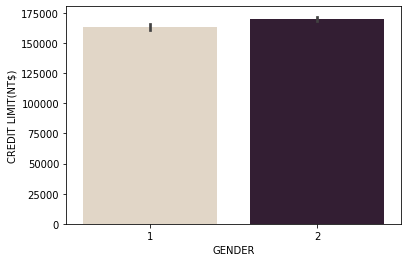

In [0]:
# barplot, eduction vs credit limit
sns.barplot(x="GENDER", y = "CREDIT LIMIT(NT$)", palette="ch:.25", data=df);
# from the plot above, we see that there are more female credit card holders than male. 
# This might account for the slight variation in the mean

1 - male, 2 - female


Gender = female; have a mean Limit higher than their male counterpart.

In [0]:
#Are people with higher education more likely to recieve higher limit on thier credit cards?
Limit_by_edu = df.groupby('EDUCATION')['CREDIT LIMIT(NT$)'].mean().sort_values(ascending = False)
Limit_by_edu 

EDUCATION
1    212956.069910
4    181316.239316
2    147062.437634
3    126550.270490
Name: CREDIT LIMIT(NT$), dtype: float64

1 = graduate school, 2 = university, 3 = high school, 4 = others

There seems to be a correlation between the limit of a customers credit card to the degree of their eduction. 

    Note: others is a combination of everything else not included in 1, 2, or 3. Therefore it sits higher on the ranking.

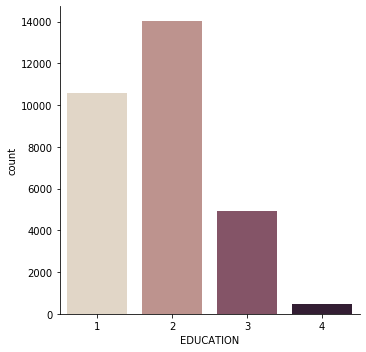

In [0]:
# barplot, count vs education
sns.catplot(x="EDUCATION", kind="count", palette="ch:.25", data=df);

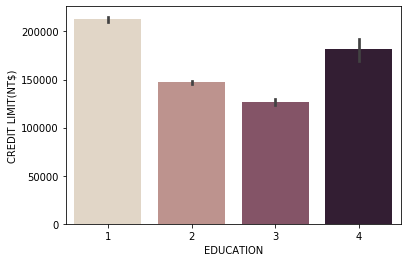

In [0]:
# barplot, eduction vs credit limit
sns.barplot(x="EDUCATION", y = "CREDIT LIMIT(NT$)", palette="ch:.25", data=df);

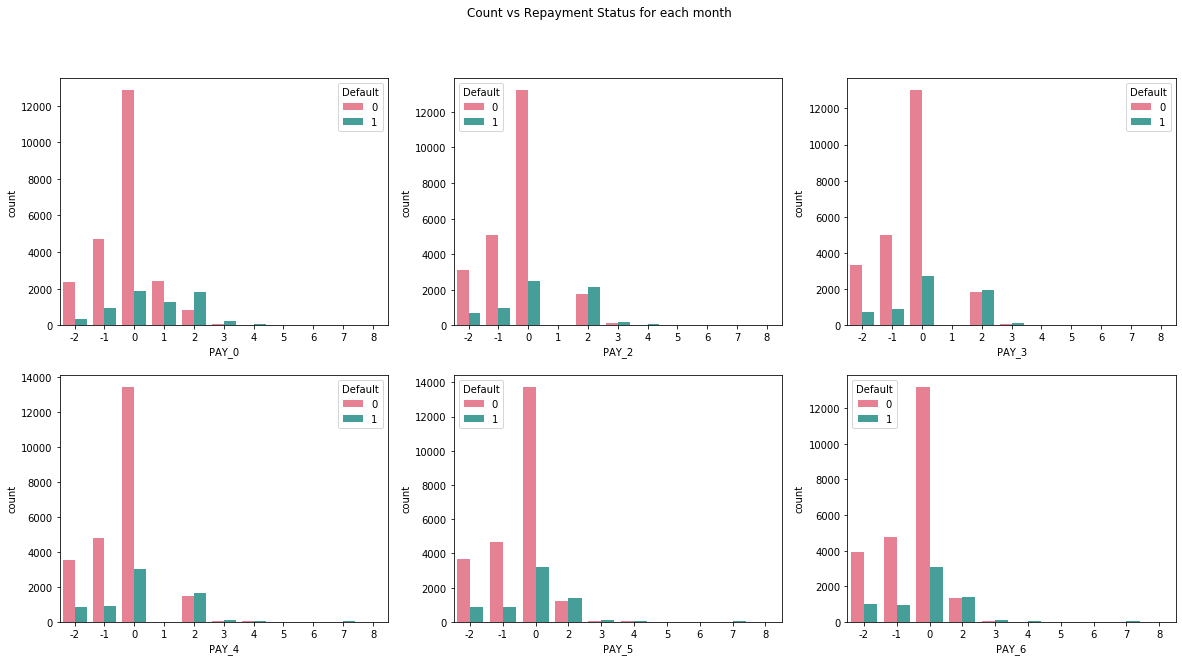

In [0]:
# count of defaults by repaymant status of each month 
#ploting count vs PAY_0 to PAY_6 

# select columns and create df that contains only PAY_0 to PAY_6
RepaymentStatus = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]


f, axes= plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Count vs Repayment Status for each month')

ax1 = sns.catplot(x="PAY_0", hue ='Default',kind = 'count', palette="husl", data=RepaymentStatus, ax=axes[0,0])
ax2 = sns.catplot(x="PAY_2", hue ='Default',kind = 'count', palette="husl", data=RepaymentStatus, ax=axes[0,1])
ax3 = sns.catplot(x="PAY_3", hue ='Default',kind = 'count', palette="husl", data=RepaymentStatus, ax=axes[0,2])
ax4 = sns.catplot(x="PAY_4", hue ='Default',kind = 'count', palette="husl", data=RepaymentStatus, ax=axes[1,0])
ax5 = sns.catplot(x="PAY_5", hue ='Default',kind = 'count', palette="husl", data=RepaymentStatus, ax=axes[1,1])
ax6 = sns.catplot(x="PAY_6", hue ='Default',kind = 'count', palette="husl", data=RepaymentStatus, ax=axes[1,2]);

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.show()

# PART 2 - Predictive Analysis



In [0]:
#part 2  - predictive model
#Check for correlation in the dataset
result = df.corr() # Finds linear pearson correlation coefficient unless specified differently using the "method" parameter 
result

,CREDIT LIMIT(NT$),GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Late Payments,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
CREDIT LIMIT(NT$),1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,-0.236763,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
GENDER,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.043760,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,0.104088,0.088986,0.057453,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,0.033168,-0.007205,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,-0.015356,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.635398,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.661151,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.653741,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.634303,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.104088,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.606932,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


Visual representation correlation

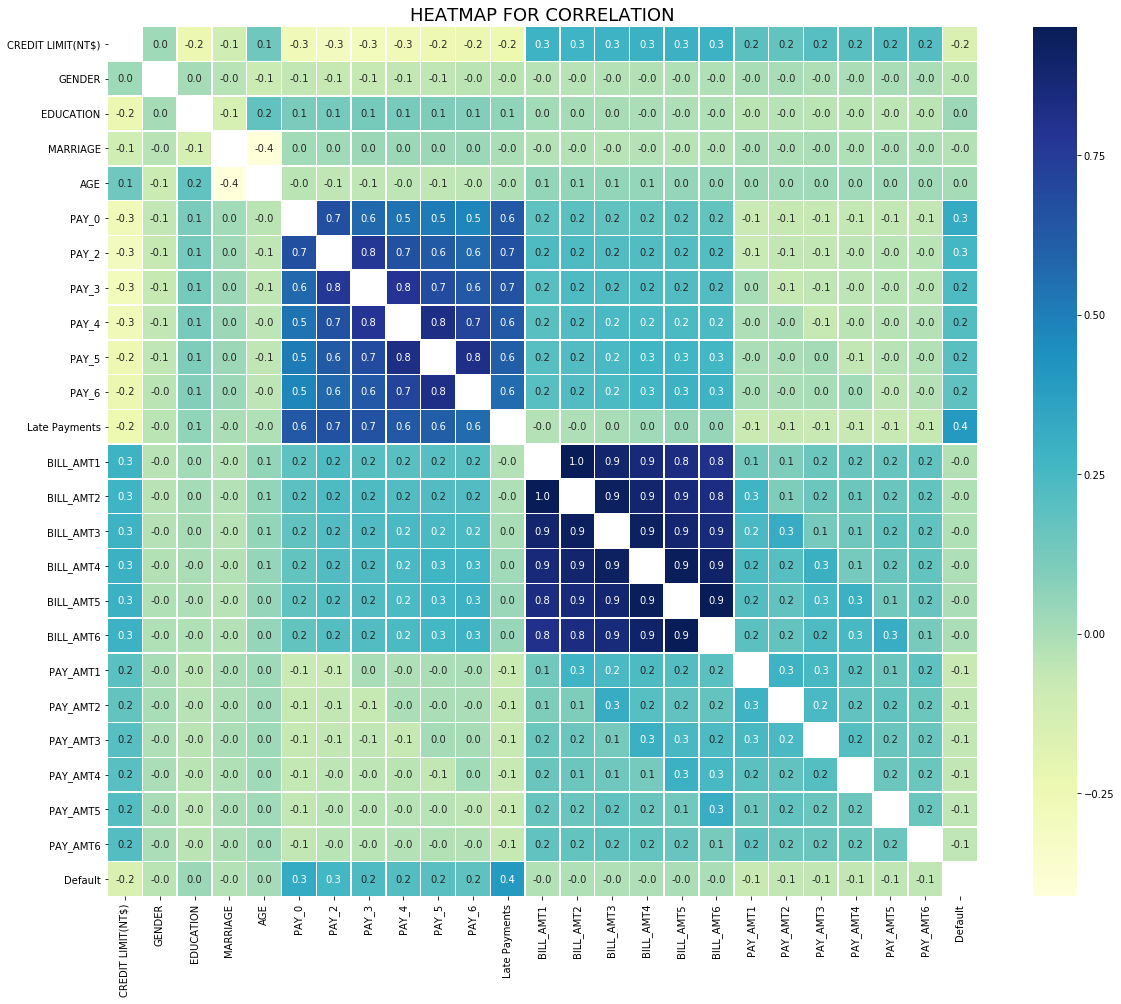

In [0]:
result = result [result < 1] ## To avoid getting correlation of variable with themselves i.e value of 1 

f,ax = plt.subplots(figsize=(20, 16))
sns.heatmap(result, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5, ax=ax)
plt.title('HEATMAP FOR CORRELATION', size=18);





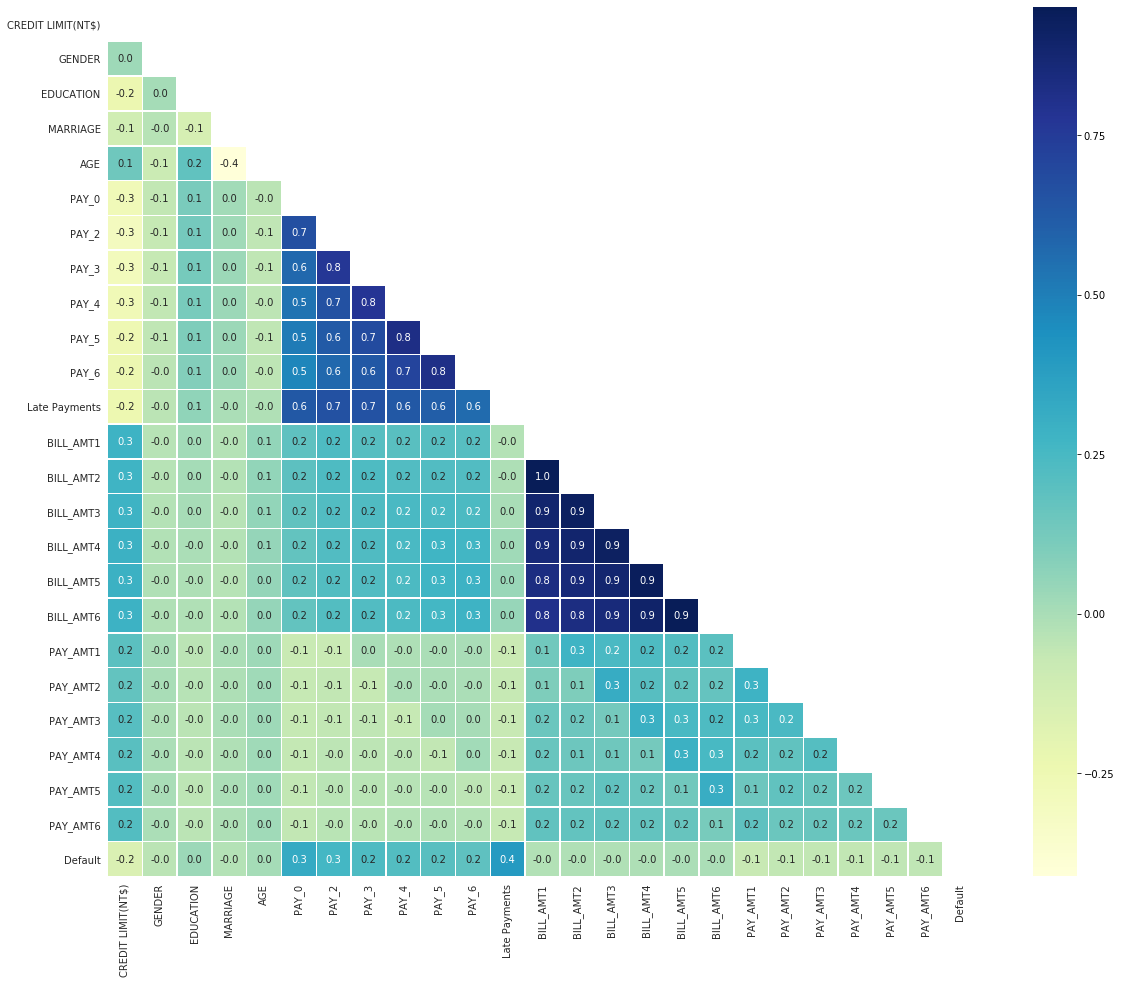

In [0]:

mask = np.zeros_like(result)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(20, 16))
sns.heatmap(result, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5,mask=mask, ax=ax)

In [0]:
import sklearn


*Isolating  Dependent and independent variable using basic pandas manipulation* 


In [0]:
# Seperate the y from the x columns
df_X= df.drop('Default',axis=1)
df_y=df['Default']

Building decision Tree training and test data. All features included

In [0]:
# build a decision tree from training data. 
# start by seperating the testing and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,
df_y, test_size=0.25, random_state=33)

Decision tree classifier 

In [0]:
# Decision tree classifier and use the fit method to train the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)


In [0]:
clf = clf.fit(X_train,y_train)
clf 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Build decision tree model and get accuracy

In [0]:
from sklearn import metrics
def measure_performance(df_X,df_y,clf, show_accuracy=True,
show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(df_X)
    if show_accuracy:
        print ('Accuracy:{0:.3f}'.format(
            metrics.accuracy_score(df_y, y_pred)
        ),"\n")
        if show_classification_report:
            print( "Classification report")
            print( metrics.classification_report(df_y,y_pred),"\n")
            if show_confusion_matrix:
                print ("Confusion matrix")
                print (metrics.confusion_matrix(df_y,y_pred),"\n")


In [0]:
 measure_performance(X_train,y_train,clf,
 show_classification_report = True, show_confusion_matrix=True)

Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17497
           1       0.71      0.33      0.45      5003

    accuracy                           0.82     22500
   macro avg       0.77      0.65      0.67     22500
weighted avg       0.81      0.82      0.79     22500
 

Confusion matrix
[[16837   660]
 [ 3362  1641]] 



True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. 


False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no.

```
Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Our dataset is not symetrical. Therefore, we need to take a look at other parameters to evaluate the performance of our model. 
For our model, we have got 0.821 which means our model is approx. 82.1% accurate.

 Accuracy = TP+TN/TP+FP+FN+TN

```
```
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all predicted default, how many were actually default? High precision relates to the low false positive rate. We have got 0.71 precision for default which is good

Precision = TP/TP+FP

```
```
Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to all observations in actual class - yes. The question recall answers is: Of all the default payments that actually happenend, how many did we predict? We have got recall of 0.33 which is bad for this model as it’s above 0.50.

Recall = TP/TP+FN
```
```
F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.41.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)
```

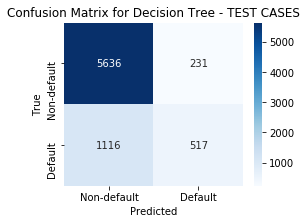

In [0]:
#Test case only
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Decision Tree - TEST CASES");

true negative = 5636




true positive = 517



False positve = 1116



False negative = 231

calculate chi-square metric between the expected variable and the observed and only select the maximum chi-squared values.

In [0]:
# The tree has an accuracy of 0.821 on the training set. This is not a good indicator,
#especially for decision trees since it is susceptible to over fitting. Therefore apply
#cross-validation, named k-fold cross-validation. 
# do feature selection with
#  1 filter based method
#  1 wrapper based method
#  1 Embedded
# ref:colab.research.google.com/drive/1qxyDpmAZ7RkJ1w0ga5Fw4mAGqboozyHs#scrollTo=5ZCLcbA6YFK2
#filter-based (chi-squared)
# calculate chi-square metric between the expected variable and the observed and only select the maximum chi-squared values.
# calculate the chi-square between the feature(x) and the target(y), and select the features with the best chi-square scores.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(df_X)
chi_selector = SelectKBest(chi2, k = 18) # default is k=10 but i want top 16
chi_selector.fit(X_norm, df_y)
chi_support = chi_selector.get_support()
chi_feature = df_X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')


18 selected features


Reccursive feature elimination - fits a model and removes the weakest features until specified number of feature is reached

In [0]:

# wrapper bases method
# Reccursive feature elimination - fits a model and removes the weakest features until specified number of feature is reached
import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)
rfe_selector = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=18, step=10, verbose=5)
rfe_selector.fit(X_norm, df_y)
rfe_support = rfe_selector.get_support()
rfe_feature = df_X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 24 features.
18 selected features


In [0]:
#embedded
#lasso :selectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=18)
embeded_lr_selector.fit(X_norm, df_y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = df_X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 selected features


In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(df_X, df_y)

pd.DataFrame({'Columns':df_X.columns, 'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)

,Columns,Importance
5,PAY_0,0.158939
4,AGE,0.073251
12,BILL_AMT1,0.064568
0,CREDIT LIMIT(NT$),0.055045
19,PAY_AMT2,0.053518
18,PAY_AMT1,0.053467
17,BILL_AMT6,0.052168
20,PAY_AMT3,0.051042
11,Late Payments,0.049968
13,BILL_AMT2,0.049057


In [0]:
print(len(chi_support), len(rfe_support), len(embeded_lr_support))

24 24 24


In [0]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':df_X.columns,'Chi-2':chi_support,'RFE':rfe_support,  'Logistics':embeded_lr_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Chi-2,RFE,Logistics,Total
1,PAY_AMT6,True,True,True,3
2,PAY_AMT5,True,True,True,3
3,PAY_AMT4,True,True,True,3
4,PAY_AMT3,True,True,True,3
5,PAY_AMT2,True,True,True,3
6,PAY_AMT1,True,True,True,3
7,PAY_6,True,True,True,3
8,PAY_5,True,True,True,3
9,PAY_4,True,True,True,3
10,PAY_3,True,True,True,3


Decision Tree with feature importance and parameter tunning

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from scipy.stats import randint

# select feature selection based on the recommendation from feature importance
Feature_fi = df[['PAY_0', 'AGE', 'BILL_AMT1', 'CREDIT LIMIT(NT$)', 'PAY_AMT6', 'PAY_AMT2', 
                 'PAY_AMT3', 'Late Payments', 'PAY_AMT5', 'BILL_AMT2', 'BILL_AMT6', 
                 'PAY_AMT1', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT4','EDUCATION','MARRIAGE', 'Default']]
                 
X_fi = Feature_fi.drop('Default', axis=1)
y_fi = df['Default']

#build a classifier
clf_fi = DecisionTreeClassifier()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fi, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 10)

start = time()
random_search.fit(X_fi, y_fi)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



RandomizedSearchCV took 63.86 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.818 (std: 0.012)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 6}

Model with rank: 2
Mean validation score: 0.817 (std: 0.013)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}

Model with rank: 3
Mean validation score: 0.816 (std: 0.015)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6}



In [0]:
# test the best parameters
print("\n\n-- Testing best parameters [Random]...")

dt_fi = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 8, min_samples_split = 2, max_leaf_nodes= 5, 
                                     random_state=0)
X_train1, X_test1, y_train1,y_test1 = train_test_split(X_fi,y_fi, test_size=0.25, random_state = 33)
dt_fi.fit(X_train1, y_train1)
y_pred1 = dt_fi.predict(X_test1)

print("Accuracy: {:.3f}", metrics.accuracy_score(y_pred1, y_test1))

scores_cv_fi = cross_val_score(dt_fi, X_fi, y_fi, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_fi.mean(),
                                          scores_cv_fi.std()),
                                          end="\n\n" )





-- Testing best parameters [Random]...
Accuracy: {:.3f} 0.8196
mean: 0.820 (std: 0.010)



In [0]:
 measure_performance(X_train1,y_train1,dt_fi,
 show_classification_report = True, show_confusion_matrix=True)

Accuracy:0.820 

Classification report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     17497
           1       0.70      0.33      0.45      5003

    accuracy                           0.82     22500
   macro avg       0.77      0.64      0.67     22500
weighted avg       0.80      0.82      0.79     22500
 

Confusion matrix
[[16789   708]
 [ 3351  1652]] 



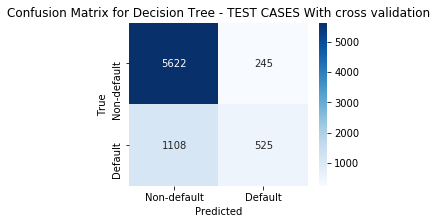

In [0]:
#Test case only confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test1, dt_fi.predict(X_test1))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Decision Tree - TEST CASES With cross validation");

Pricision tree with feature selection and parameter tunning

In [0]:
# cross validation
# select feature selection based on the recommendation from feature selection methods
Feature_fs = df[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3','PAY_AMT2', 'PAY_AMT1',
                 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0',
                 'MARRIAGE', 'Late Payments','CREDIT LIMIT(NT$)','AGE','BILL_AMT2', 'GENDER', 'Default']]
                 
X_fs = Feature_fs.drop('Default', axis=1)
y_fs = df['Default']


#build a classifier
clf_fs = DecisionTreeClassifier()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}       
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fs, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_fs, y_fs)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 17.44 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.819 (std: 0.009)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2}

Model with rank: 2
Mean validation score: 0.818 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 6}

Model with rank: 3
Mean validation score: 0.818 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 3}



In [0]:
# test the best parameters
print("\n\n-- Testing best parameters [Random]...")

dt_fs = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split = 5,
                                     max_features= 7, min_samples_leaf= 2, max_leaf_nodes = 5, random_state=33)

X_train2, X_test2, y_train2,y_test2 = train_test_split(X_fs,y_fs, test_size=0.25, random_state = 33)
dt_fs.fit(X_train2, y_train2)
y_pred2 = dt_fs.predict(X_test2)


print("Accuracy: {:.3f}", metrics.accuracy_score(y_pred2, y_test2))

scores_cv_fs = cross_val_score(dt_fs, X_fs , y_fs, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_fs.mean(),
                                          scores_cv_fs.std()),
                                          end="\n\n" )




-- Testing best parameters [Random]...
Accuracy: {:.3f} 0.8196
mean: 0.813 (std: 0.008)



Best of the tree models. has the highest recall. although still a bad predictor since recall is less than .50. but .41 is a good improvement from .33.

In [0]:
 measure_performance(X_train,y_train,dt_fs,
 show_classification_report = True, show_confusion_matrix=True)

Accuracy:0.817 

Classification report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     17497
           1       0.64      0.41      0.50      5003

    accuracy                           0.82     22500
   macro avg       0.74      0.67      0.69     22500
weighted avg       0.80      0.82      0.80     22500
 

Confusion matrix
[[16313  1184]
 [ 2935  2068]] 



Plot ROC curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

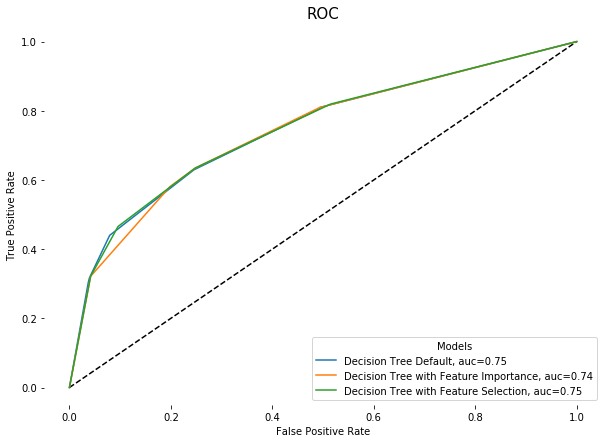

In [0]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 

y_pred_DT_Basic = clf.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_DT_Basic)
auc1 = metrics.roc_auc_score(y_test, y_pred_DT_Basic)

y_pred_DT_fi = dt_fi.predict_proba(X_test1)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test1,  y_pred_DT_fi)
auc2 = metrics.roc_auc_score(y_test1,y_pred_DT_fi)

y_pred_DT_fs = dt_fs.predict_proba(X_test2)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test2,  y_pred_DT_fs)
auc3 = metrics.roc_auc_score(y_test2, y_pred_DT_fs)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree Default, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree with Feature Importance, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Decision Tree with Feature Selection, auc="+str(round(auc3,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

# PART 3 - Prescriptive ... Explained in slides